In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:

# URL de l'API
api_url = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/subventions-associations-votees-/records?limit=20"

# Effectuer la requête GET
response = requests.get(api_url)

# Vérifier le statut de la requête
if response.status_code == 200:
    # Charger les données en JSON
    data = response.json()
    # Afficher un extrait
    print(json.dumps(data, indent=4))
else:
    print(f"Erreur lors de l'appel à l'API : {response.status_code}")


{
    "total_count": 97705,
    "results": [
        {
            "numero_de_dossier": "2022_06386",
            "annee_budgetaire": "2022",
            "collectivite": "Ville de Paris",
            "nom_beneficiaire": "LA MAISON OUVERTE",
            "numero_siret": "32450071900020",
            "objet_du_dossier": "RESIDENCE EN COLLEGE 2022 IMPROVISATIONS SPORTIVES ET THE\u00c2TRALES / MON BEL ORANGER",
            "montant_vote": 5000,
            "direction": "DASCO",
            "nature_de_la_subvention": "Projet",
            "secteurs_d_activites_definies_par_l_association": null
        },
        {
            "numero_de_dossier": "2022_05129",
            "annee_budgetaire": "2022",
            "collectivite": "Ville de Paris",
            "nom_beneficiaire": "LA PETITE ROCKETTE",
            "numero_siret": "50882247500028",
            "objet_du_dossier": "La Cadette - nouveau lieu des transformations et des transitions (DPE)",
            "montant_vote": 10000,
          

In [4]:
# URL de base
base_url = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/subventions-associations-votees-/records"
limit = 100  # Nombre d'enregistrements par requête
offset = 0  # Début de pagination
total_records = 97705  # Nombre total d'enregistrements dans la base
all_data = []  # Pour stocker toutes les données

while offset < total_records:
    # Construire l'URL avec pagination
    url = f"{base_url}?limit={limit}&offset={offset}"
    print(f"Récupération des données à partir de l'offset : {offset}")

    # Effectuer la requête
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        # Ajouter les résultats à la liste principale
        results = data.get("results", [])
        all_data.extend(results)
        # Augmenter l'offset pour la requête suivante
        offset += limit
    else:
        print(f"Erreur lors de l'appel à l'API : {response.status_code}")
        break

# Sauvegarder toutes les données dans un fichier JSON
with open("subventions_completes.json", "w", encoding="utf-8") as f:
    json.dump(all_data, f, ensure_ascii=False, indent=4)

print("Toutes les données ont été récupérées et sauvegardées.")


Récupération des données à partir de l'offset : 0
Récupération des données à partir de l'offset : 100
Récupération des données à partir de l'offset : 200
Récupération des données à partir de l'offset : 300
Récupération des données à partir de l'offset : 400
Récupération des données à partir de l'offset : 500
Récupération des données à partir de l'offset : 600
Récupération des données à partir de l'offset : 700
Récupération des données à partir de l'offset : 800
Récupération des données à partir de l'offset : 900
Récupération des données à partir de l'offset : 1000
Récupération des données à partir de l'offset : 1100
Récupération des données à partir de l'offset : 1200
Récupération des données à partir de l'offset : 1300
Récupération des données à partir de l'offset : 1400
Récupération des données à partir de l'offset : 1500
Récupération des données à partir de l'offset : 1600
Récupération des données à partir de l'offset : 1700
Récupération des données à partir de l'offset : 1800
Récup

In [5]:
# Charger les données JSON dans un DataFrame
df = pd.DataFrame(all_data)
df.head(5)  # Exemple : Analyser les subventions totales par année

,numero_de_dossier,annee_budgetaire,collectivite,nom_beneficiaire,numero_siret,objet_du_dossier,montant_vote,direction,nature_de_la_subvention,secteurs_d_activites_definies_par_l_association
0,2022_06386,2022,Ville de Paris,LA MAISON OUVERTE,32450071900020,RESIDENCE EN COLLEGE 2022 IMPROVISATIONS SPORT...,5000,DASCO,Projet,None
1,2022_05129,2022,Ville de Paris,LA PETITE ROCKETTE,50882247500028,La Cadette - nouveau lieu des transformations ...,10000,DPE,Projet,None
2,2022_02551,2022,Ville de Paris,LA PLANETE DES ENFANTS,48442110200027,demande subvention 2022 - Les Fraises des Bois,128540,DFPE,Fonctionnement,None
3,2022_02106,2022,Ville de Paris,LA PORTE À CÔTÉ,82788306700056,PROJET RADIO SOLIDARITE ANGELE MERCIER,1640,DDCT,Projet,None
4,2022_01512,2022,Ville de Paris,LA SIERRA PROD,50790493600030,CPO SPV Ateliers de création artistique,5000,DDCT,Projet,None


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   numero_de_dossier                                10000 non-null  object
 1   annee_budgetaire                                 10000 non-null  object
 2   collectivite                                     10000 non-null  object
 3   nom_beneficiaire                                 9999 non-null   object
 4   numero_siret                                     9975 non-null   object
 5   objet_du_dossier                                 10000 non-null  object
 6   montant_vote                                     10000 non-null  int64 
 7   direction                                        10000 non-null  object
 8   nature_de_la_subvention                          10000 non-null  object
 9   secteurs_d_activites_definies_par_l_asso

In [26]:
df.isnull().sum()

numero_de_dossier                                    0
annee_budgetaire                                     0
collectivite                                         0
nom_beneficiaire                                     1
numero_siret                                        25
objet_du_dossier                                     0
montant_vote                                         0
direction                                            0
nature_de_la_subvention                              0
secteurs_d_activites_definies_par_l_association    903
dtype: int64

In [27]:
df['montant_vote'].describe()

count    1.000000e+04
mean     3.153041e+04
std      2.486631e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+03
75%      8.000000e+03
max      9.192000e+06
Name: montant_vote, dtype: float64

In [28]:
df['annee_budgetaire'].unique()

array(['2022', '2019', '2020', '2021', '2016', '2017', '2018', '2015',
       '2023', '2013', '2014', '2024'], dtype=object)

In [29]:
df['nom_beneficiaire'].unique()

array(['LA MAISON OUVERTE', 'LA PETITE ROCKETTE',
       'LA PLANETE DES ENFANTS', ...,
       'FEDERATION NATIONALE DES ANCIENS COMBATTANTS EN ALGERIE MAROC ET TUNISIE FNACA COMITE DU 16EME ARRONDISSEMENT',
       'FEDERATION NATIONALE DES ANCIENS COMBATTANTS RESIDANT HORS DE FRANCE',
       'FESSEF (FEDERATION DES ETUDIANTS ET STAGIAIRES SENEGALAIS DE FRANCE)'],
      dtype=object)

# Evolution des subventions

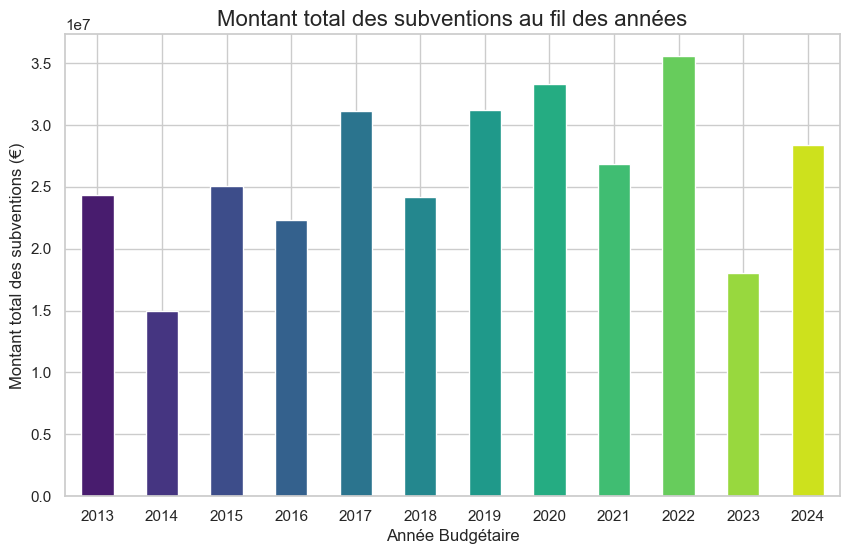

In [38]:
montant_par_annee = df.groupby("annee_budgetaire")["montant_vote"].sum()
# Appliquer un style Seaborn
sns.set_theme(style="whitegrid")

# Créer un diagramme en barres avec un style plus joli
plt.figure(figsize=(10, 6))
ax = montant_par_annee.plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(montant_par_annee)))

# Ajouter des titres et labels
plt.title("Montant total des subventions au fil des années", fontsize=16)
plt.xlabel("Année Budgétaire", fontsize=12)
plt.ylabel("Montant total des subventions (€)", fontsize=12)
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()

In [24]:
montant_par_annee["2022"]

35552068

### On voit qu'il y a plus de subventions en 2022, soit 35552068 euros.

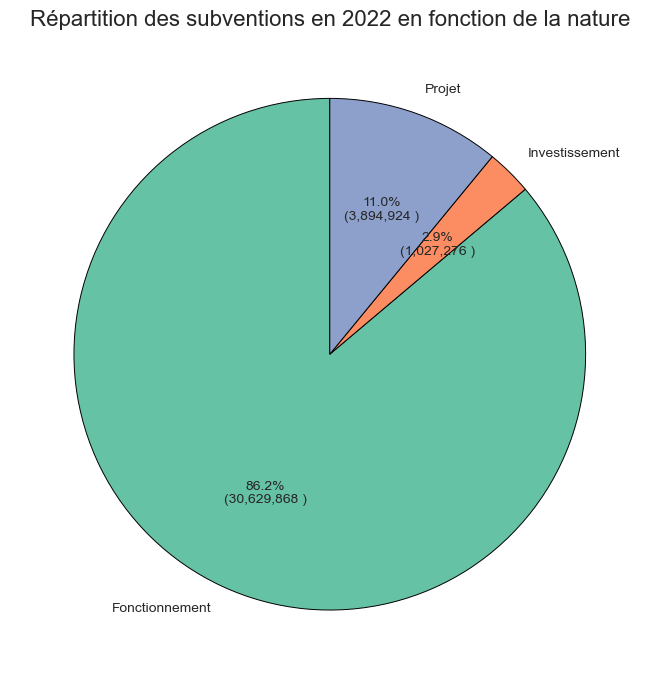

In [44]:
# Filtrer les données pour l'année 2022
df_2022 = df[df["annee_budgetaire"] == "2022"]

# Grouper par nature_de_la_subvention et calculer la somme des montants
montant_par_nature = df_2022.groupby("nature_de_la_subvention")["montant_vote"].sum()

# Créer un diagramme circulaire
plt.figure(figsize=(7, 7))
colors = sns.color_palette("Set2", n_colors=len(montant_par_nature))

# Création du diagramme circulaire
plt.pie(
    montant_par_nature,
    labels=montant_par_nature.index,  # Noms des catégories
    autopct=lambda p: f"{p:.1f}%\n({p * sum(montant_par_nature) / 100:,.0f} )",  # Affichage % et montant
    colors=colors,
    startangle=90,  # Angle de départ pour une meilleure lisibilité
    wedgeprops={"edgecolor": "black", "linewidth": 0.7},  # Contour des parts
    textprops={"fontsize": 10}  # Taille des étiquettes
)

ax.grid(False)

# Ajouter un titre
plt.title("Répartition des subventions en 2022 en fonction de la nature", fontsize=16)
plt.tight_layout()

# Afficher le graphique
plt.show()


# Cherchons les secteurs les plus subventionnés

In [40]:
# Convertir les listes en chaînes de caractères
df['secteurs_d_activites_definies_par_l_association_str'] = df['secteurs_d_activites_definies_par_l_association'].astype(str)

# Obtenir les valeurs uniques
valeurs_uniques = df['secteurs_d_activites_definies_par_l_association_str'].unique()
print("Liste des Secteurs d'Activités :")
print(valeurs_uniques)


Liste des Secteurs d'Activités :
['None' "['Loisirs', 'Social', 'Vie et animation locale']"
 "['Culture & Arts']"
 "['Environnement & écologie', 'Sport', 'Vie et animation locale']"
 "['Education & formation', 'Emploi', 'Précarité & Exclusion']"
 "['Education & formation', 'Santé', 'Social']"
 "['Education & formation', 'Social', 'Vie et animation locale']"
 "['Défense des droits et des intérêts', 'Education & formation', 'Précarité & Exclusion']"
 "['Economie', 'Environnement & écologie', 'Vie et animation locale']"
 "['Emploi', 'Précarité & Exclusion', 'Social']"
 "['Culture & Arts', 'Economie', 'Environnement & écologie']"
 "['Education & formation', 'Humanitaire', 'Santé']" "['Social']"
 "['Education & formation', 'Environnement & écologie', 'Social']"
 "['Culture & Arts', 'Social', 'Vie et animation locale']"
 "['Loisirs', 'Précarité & Exclusion', 'Social']"
 "['Précarité & Exclusion', 'Santé', 'Social']"
 "['Culture & Arts', 'Précarité & Exclusion', 'Vie et animation locale']"
 "

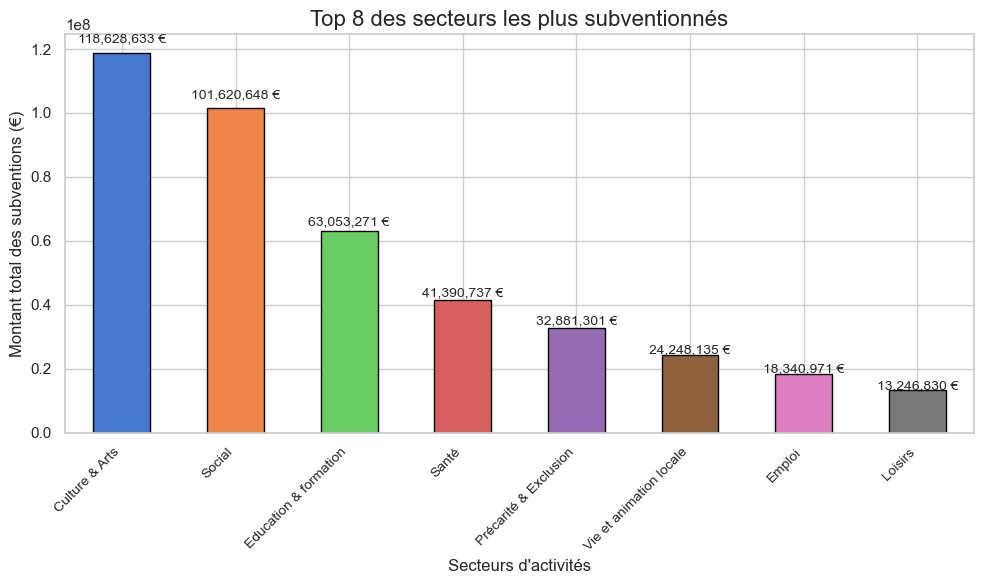

In [43]:

# la colonne contient des listes, il faut les aplatir d'abord
if df["secteurs_d_activites_definies_par_l_association"].apply(lambda x: isinstance(x, list)).any():
    df_exploded = df.explode("secteurs_d_activites_definies_par_l_association")
else:
    df_exploded = df

# Grouper par secteur et calculer les montants totaux
montant_par_secteur = df_exploded.groupby("secteurs_d_activites_definies_par_l_association")["montant_vote"].sum()

# Trier et sélectionner les 8 secteurs les plus subventionnés
top_8_secteurs = montant_par_secteur.sort_values(ascending=False).head(8)

# Création du graphique
plt.figure(figsize=(10, 6))
colors = sns.color_palette("muted", n_colors=8)

# Diagramme en barres
top_8_secteurs.plot(kind="bar", color=colors, edgecolor="black")

# Ajouter des titres et labels
plt.title("Top 8 des secteurs les plus subventionnés", fontsize=16)
plt.xlabel("Secteurs d'activités", fontsize=12)
plt.ylabel("Montant total des subventions (€)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajouter des étiquettes sur chaque barre
for i, v in enumerate(top_8_secteurs):
    plt.text(i, v + v * 0.03, f"{v:,.0f} €", ha="center", fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()


### Le graphique montre les 8 secteurs d'activités les plus subventionnés, avec les montants totaux des subventions (en euros) attribués à chacun.

### Culture & Arts est de loin le secteur le plus subventionné, avec environ 118,6 millions d'euros, ce qui montre une priorité notable donnée à ce domaine. Cela peut inclure des financements pour des événements culturels, des institutions artistiques ou des projets créatifs.

### Social suit en deuxième position avec 101,6 millions d'euros, soulignant l'importance des actions en faveur des populations vulnérables ou des initiatives sociales.

### Éducation & Formation arrive en troisième position avec 63 millions d'euros, ce qui témoigne de l'investissement dans le développement des compétences et la formation, essentiel pour le futur.

### Santé est en quatrième position avec 41,4 millions d'euros, montrant que la santé publique reste une préoccupation importante, bien que moins prioritaire que les secteurs précédents.

### Précarité & Exclusion (32,9 millions d'euros) met en lumière les efforts pour réduire les inégalités sociales et aider les personnes en difficulté.

### Vie et animation locale (24,2 millions d'euros) reflète les subventions allouées aux initiatives locales, peut-être pour renforcer la cohésion sociale dans les collectivités.

### Emploi (18,3 millions d'euros) est plus bas dans le classement, ce qui pourrait indiquer un financement plus spécifique ou moins important par rapport aux autres domaines.

### Enfin, Loisirs reçoit 13,2 millions d'euros, probablement pour soutenir les activités récréatives et de divertissement.

### 86.2% des subventions sont de nature fonctionnement en 2022.

# Analysons les subvention en fonction de la nature

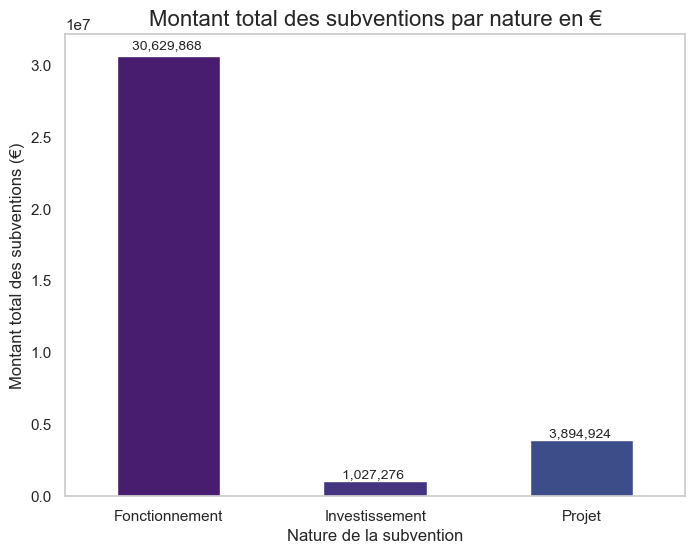

In [15]:
# Appliquer un style Seaborn
sns.set_theme(style="whitegrid")

# Créer un diagramme en barres avec un style plus joli
plt.figure(figsize=(8, 6))
ax = montant_par_nature.plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(montant_par_annee)))

ax.grid(False)

# Ajouter des montants sur chaque barre
for i, v in enumerate(montant_par_nature):
    ax.text(i, v + (v * 0.01), f"{v:,.0f} ", ha='center', va='bottom', fontsize=10)

# Ajouter des titres et labels
plt.title("Montant total des subventions par nature en €", fontsize=16)
plt.xlabel("Nature de la subvention", fontsize=12)
plt.ylabel("Montant total des subventions (€)", fontsize=12)
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()

## Le graphique illustre le montant total des subventions allouées en fonction de leur nature : Fonctionnement, Investissement, et Projet.

* ## Subventions de Fonctionnement :

### C'est de loin la catégorie la plus subventionnée avec 30,6 millions d'euros. Cela reflète l'importance accordée aux dépenses récurrentes nécessaires au bon fonctionnement des structures ou organisations subventionnées (par exemple, salaires, loyers, maintenance).

* ## Subventions pour des Projets :

### Les subventions destinées à des projets atteignent 3,9 millions d'euros, bien qu'elles soient significativement inférieures à celles de fonctionnement. Ces fonds sont souvent dédiés à des initiatives spécifiques ou ponctuelles, comme des événements ou des programmes particuliers.

* ## Subventions d'Investissement :

### Avec seulement 1,02 million d'euros, les subventions pour des investissements sont les plus faibles. Cela peut indiquer que peu de fonds sont alloués à des dépenses d'immobilisation, comme l'achat d'équipements ou la construction d'infrastructures.

## Analyse et interprétation :
### Le graphique montre une nette priorité pour les subventions de fonctionnement, ce qui est logique pour assurer la stabilité et la continuité des organisations bénéficiaires.
### Les subventions de projets et d'investissement sont bien moins importantes, indiquant que les initiatives à court terme ou les dépenses de capital ne sont pas la priorité principale dans cette distribution budgétaire.
### Cela pourrait également refléter une stratégie où les structures bénéficiaires doivent d'abord stabiliser leur fonctionnement avant de recevoir un soutien pour des initiatives ou des investissements supplémentaires.

### Ce déséquilibre dans la répartition des subventions peut être justifié par les besoins immédiats des organisations, mais il serait intéressant d'évaluer si un rééquilibrage pourrait avoir un impact positif à long terme, notamment en augmentant les fonds pour des projets innovants ou des investissements structurants.

# Quels sont les collectivités les plus subventionnées ?

In [46]:
df['collectivite'].unique()

array(['Ville de Paris', 'Département de Paris', 'v'], dtype=object)

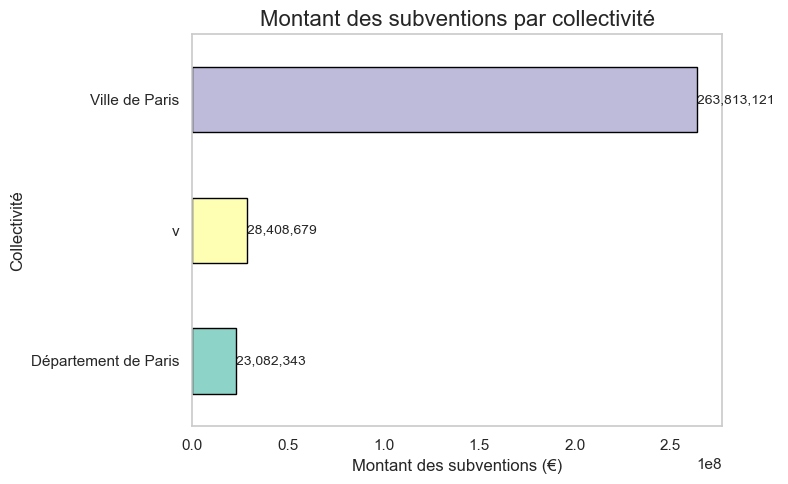

In [49]:
# Grouper par collectivité et calculer la somme des montants
montant_par_collectivite = df.groupby("collectivite")["montant_vote"].sum().sort_values(ascending=True)

# Création du graphique en barres horizontales
plt.figure(figsize=(8, 5))
colors = sns.color_palette("Set3", n_colors=len(montant_par_collectivite))

# Diagramme en barres horizontales
ax = montant_par_collectivite.plot(
    kind="barh",
    color=colors,
    edgecolor="black"
)

# Désactiver la grille
ax.grid(False)

# Ajouter des étiquettes
for i, v in enumerate(montant_par_collectivite):
    plt.text(v + 1000, i, f"{v:,.0f} ", va="center", fontsize=10)  # Position et format des étiquettes

# Ajouter un titre et des axes
plt.title("Montant des subventions par collectivité", fontsize=16)
plt.xlabel("Montant des subventions (€)", fontsize=12)
plt.ylabel("Collectivité", fontsize=12)

# Ajustement de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


### On voit que la ville de Paris est la plus subventionnée avec une somme d'environ 263 millions d'euros.